In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

## Random integers in python

In [2]:
N=8
np.random.randint(0, 9, N)

array([0, 5, 2, 0, 4, 0, 7, 6])

In [3]:
N=8
1-2*np.random.randint(0, 2, N)

array([-1,  1,  1, -1, -1, -1,  1,  1])

## Random walks

In [4]:
def RW(N):
    return np.cumsum(1-2*np.random.randint(0, 2, N))     # radom walk code

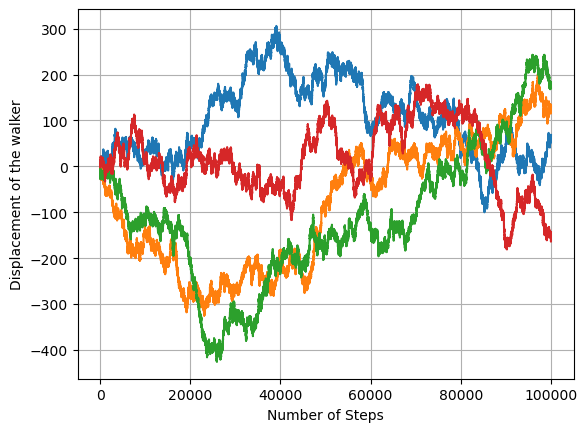

In [7]:
N  = 10**5; # number of steps

plt.plot(RW(N));   ## RW1
plt.plot(RW(N));   ## RW2
plt.plot(RW(N));   ## RW3
plt.plot(RW(N));   ## RW4

plt.xlabel('Number of Steps'); plt.ylabel('Displacement of the walker'); plt.grid()

### Distributiteon of Displacement after N number of steps

Compute the final displacements of several walk and then histogram it...

In [8]:
@jit(nopython=False)
def RW_R():
    N = 1500        # step length
    Nw = 10**6     # number of random walks
    R = np.zeros(Nw)
    for i in range(Nw):
        x = np.cumsum(1-2*np.random.randint(0, 2, N))
        R[i] = x[-1]/(np.sqrt(N))
    return R


### Generate an array of final displacements
R=RW_R()

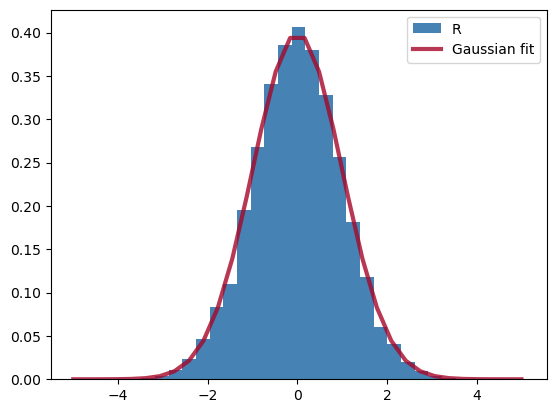

In [9]:
nBins=32

plt.hist(R, bins=nBins, density=True, histtype='bar', color='steelblue', linewidth=2, label='R')


def Gauss(xx):
    variance = 1
    mean=0
    fac = 1/np.sqrt(2*np.pi*variance)
    return  fac*np.exp(-(xx-mean)**2/(2*variance))
    
xx = np.linspace (-5, 5, 32)
plt.plot(xx, Gauss(xx), color='#A60628',linewidth=3,label='Gaussian fit',alpha=0.8)

plt.legend()